# Introducción al análisis y manipulación de datos con Python y pandas

## ¿Qué es pandas?

[pandas](https://pandas.pydata.org/) es una biblioteca de código abierto que te ayuda a analizar y manipular datos.

## ¿Por qué pandas?

pandas proporciona un conjunto de funciones fáciles de usar pero muy potentes que puedes aplicar a tus datos.

Está integrado con muchas otras herramientas de ciencia de datos y que usan Python.

Uno de los principales casos de uso que encontrarás es usar pandas para transformar tus datos de manera que sean utilizables con algoritmos de aprendizaje automático.

## ¿Qué cubre este notebook?

Como la biblioteca pandas es muy amplia, a menudo hay muchas formas de hacer lo mismo. Este notebook cubre algunas de las funciones más fundamentales de la biblioteca, que son más que suficientes para comenzar.

## 0. Importar pandas

Para comenzar a usar pandas, el primer paso es importarlo.

La forma más común (y la que deberías usar) es importar pandas con la abreviatura `pd` (por ejemplo, `pandas` → `pd`).

Si ves las letras `pd` en cualquier parte relacionada con ciencia de datos, probablemente se refiera a la biblioteca pandas.

In [16]:
import pandas as pd

## 1. Tipos de datos

pandas tiene dos tipos de datos principales: `Series` y `DataFrame`.
* [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) - una columna de datos unidimensional.
* [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) (el más común) - una tabla de datos bidimensional con filas y columnas.

Puedes crear una `Series` usando `pd.Series()` y pasándole una lista de Python.

In [17]:
cars = pd.Series(['BMW', 'Toyota', 'Ford'])
cars

0       BMW
1    Toyota
2      Ford
dtype: object

In [18]:
colores = pd.Series(['Rojo', 'Blanco', 'Negro'])

Puedes crear un `DataFrame` usando `pd.DataFrame()` y pasándole un diccionario de Python.

Vamos a usar nuestras dos `Series` como valores.

In [19]:
car_data = pd.DataFrame({'car brand': cars, 
                         'colores': colores})
car_data

,car brand,colores
0,BMW,Rojo
1,Toyota,Blanco
2,Ford,Negro


Puedes ver que las claves del diccionario se convirtieron en los encabezados de las columnas (texto en negrita) y los valores de las dos `Series` se convirtieron en los valores del DataFrame.

Es importante notar que muchos tipos diferentes de datos pueden ir en el DataFrame.

Aquí hemos usado solo texto, pero podrías usar flotantes, enteros, fechas y más.

### Ejercicios

1. Crea una `Series` de diferentes alimentos.
2. Crea una `Series` de diferentes valores en dólares (pueden ser enteros).
3. Combina tus `Series` de alimentos y valores en dólares en un `DataFrame`.

Pruébalo tú mismo primero, luego compara tu código con la solución.

**Nota**: Asegúrate de que tus dos `Series` tengan el mismo tamaño antes de combinarlas en un DataFrame.

In [20]:
alimentos = pd.Series(['Manzana', 'Platano', 'Hamburguesas'])
precios = pd.Series([1, 2, 11])
alimentos_data = pd.DataFrame({'Alimentos': alimentos, 
                               'Precios': precios})
alimentos_data

,Alimentos,Precios
0,Manzana,1
1,Platano,2
2,Hamburguesas,11


## 2. Importar datos

Crear `Series` y `DataFrame` desde cero está bien, pero lo que normalmente harás es importar tus datos en forma de archivo `.csv` (valores separados por comas), archivo de hoja de cálculo o algo similar como una [base de datos SQL](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html).

pandas permite importar fácilmente datos como estos mediante funciones como [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) (para archivos de Microsoft Excel).

Supongamos que quieres obtener esta información de un documento de Google Sheets en un `DataFrame` de pandas.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/pandas-car-sales-csv.png?raw=1" alt="spreadsheet with car sales information" width="600">

Puedes exportarlo como archivo `.csv` y luego importarlo usando `pd.read_csv()`.

En este caso, el archivo `.csv` exportado se llama `car-sales.csv.`


In [21]:
car_sales = pd.read_csv('car-sales.csv')

Ahora tenemos los mismos datos de la hoja de cálculo disponibles en un `DataFrame` de pandas llamado `car_sales`.

Tener tus datos disponibles en un `DataFrame` te permite aprovechar toda la funcionalidad de pandas.

Otra práctica común que verás es importar datos en un `DataFrame` llamado `df` (abreviatura de DataFrame).

In [22]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Ahora `car_sales` y `df` contienen exactamente la misma información, la única diferencia es el nombre. Como cualquier otra variable, puedes nombrar tus `DataFrame` como quieras. Pero es mejor elegir algo simple.

### Anatomía de un DataFrame

Diferentes funciones usan diferentes etiquetas para distintas cosas. Este gráfico resume algunos de los componentes principales de los `DataFrame` y sus distintos nombres.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/pandas-dataframe-anatomy.png?raw=1" alt="pandas dataframe with different sections labelled" width="800"/>


## 3. Exportar datos

Después de hacer algunos cambios en tus datos, puede que quieras exportarlos y guardarlos para que otra persona pueda acceder a los cambios.

pandas te permite exportar `DataFrame` a formato `.csv` usando [`.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) o a formato de hoja de cálculo usando [`.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html).

Aún no hemos hecho cambios al `DataFrame` `car_sales`, pero vamos a intentar exportarlo.

In [23]:
car_sales.to_csv('exported-car-sales.csv')

Al ejecutar esto se guardará un archivo llamado `export-car-sales.csv` en la carpeta actual.

## 4. Describir datos

Una de las primeras cosas que querrás hacer después de importar algunos datos a un `DataFrame` de pandas es empezar a explorarlos.

pandas tiene muchas funciones integradas que te permiten obtener rápidamente información sobre un `DataFrame`.

Vamos a explorar algunas usando el `DataFrame` `car_sales`.

[`.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) nos muestra qué tipo de dato contiene cada columna.

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

Observa cómo la columna `Price` no es un entero como `Odometer` o `Doors`. No te preocupes, pandas hace que esto sea fácil de corregir.

[`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) te da una visión estadística rápida de las columnas numéricas.

In [25]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


[`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) muestra información útil sobre un `DataFrame`, como:

* Cuántas entradas (filas) hay
* Si hay valores faltantes (si el número de valores no nulos de una columna es menor que el número de entradas, hay valores faltantes)
* Los tipos de datos de cada columna

In [26]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


También puedes llamar a varios métodos estadísticos y matemáticos como [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) o [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) directamente sobre un `DataFrame` o una `Series`.

In [27]:
car_sales.mean(numeric_only=True)

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [28]:
car_prices = pd.Series([3000, 3500, 11250])
car_prices.mean()

np.float64(5916.666666666667)

In [29]:
car_sales.sum(numeric_only=True)

Odometer (KM)    786014
Doors                40
dtype: int64

In [30]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [31]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

Llamar a estas funciones sobre todo el `DataFrame` puede no ser tan útil como aplicarlas a una columna individual. Pero es útil saber que existen.

`.columns` te mostrará todas las columnas de un `DataFrame`.

In [32]:
len(car_sales)

10

Puedes guardarlas en una lista para usarlas más adelante.

`.index` te mostrará los valores del índice de un `DataFrame` (la columna de la izquierda).

Los `DataFrame` de pandas, como las listas de Python, están indexados desde 0 (a menos que se cambie). Esto significa que comienzan en 0.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/pandas-dataframe-zero-indexed.png?raw=1" alt="dataframe with index number 0 highlighted" width="700"/>

Así que aunque la longitud de nuestro DataFrame `car_sales` sea 10, esto significa que los índices van de 0 a 9.

## 5. Visualizar y seleccionar datos

Algunos métodos comunes para visualizar y seleccionar datos en un DataFrame de pandas incluyen:

* [`DataFrame.head(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) - Muestra las primeras `n` filas de un `DataFrame` (por ejemplo, `car_sales.head()` mostrará las primeras 5 filas).
* [`DataFrame.tail(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) - Muestra las últimas `n` filas.
* [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) - Accede a un grupo de filas y columnas por etiquetas o por un array booleano.
* [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) - Accede a un grupo de filas y columnas por índices enteros (por ejemplo, `car_sales.iloc[0]` muestra todas las columnas del índice 0).
* [`DataFrame.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) - Lista las etiquetas de las columnas del DataFrame.
* `DataFrame['A']` - Selecciona la columna llamada `'A'` del DataFrame.
* `DataFrame[DataFrame['A'] > 5]` - Indexación booleana que filtra filas basadas en valores de columna que cumplen una condición (por ejemplo, todas las filas de la columna `'A'` mayores que `5`).
* [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) - Crea un gráfico de líneas de las columnas del DataFrame (por ejemplo, graficar `Make` vs. `Odometer (KM)` con `car_sales[["Make", "Odometer (KM)"]].plot();`).
* [`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) - Genera histogramas para las columnas del DataFrame.
* [`pandas.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) - Calcula una tabla cruzada de dos o más factores.

En la práctica, estarás constantemente haciendo cambios a tus datos y visualizándolos. Cambiándolos, visualizándolos, cambiándolos, visualizándolos.

No siempre querrás cambiar todos los datos de tus `DataFrame`, así que hay tantas formas de seleccionar datos como de visualizarlos.

`.head()` te permite ver las primeras 5 filas de tu `DataFrame`. Probablemente lo usarás mucho.

In [33]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


¿Por qué 5 filas? Buena pregunta. No sé la respuesta. Pero 5 parece una cantidad razonable.

¿Quieres más de 5?
No hay problema, puedes pasarle un entero a `.head()` para mostrar más o menos de 5 filas.

In [34]:
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


`.tail()` te permite ver las últimas 5 filas de tu `DataFrame`. Esto es útil si tus cambios afectan las últimas filas de tus datos.

In [35]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Puedes usar `.loc[]` y `.iloc[]` para seleccionar datos de tus `Series` y `DataFrame`.

Veámoslo.

`.loc[]` recibe como entrada un número entero o una etiqueta. Y selecciona de tu `Series` o `DataFrame` el índice que coincida con ese número.

Probemos con nuestro DataFrame `car_sales`.

`iloc[]` hace algo similar pero funciona con posiciones exactas.


Aunque `'snake'` aparece en el índice 8 de la serie, se muestra usando `.iloc[3]` porque está en la tercera posición (empezando desde 0).

Probemos con el `DataFrame` `car_sales`.

Puedes ver que es lo mismo que usar `.loc[]` porque el índice está en orden; la posición 3 es igual al índice 3.

También puedes usar slicing (rebanado) con `.loc[]` y `.iloc[]`.

¿Cuándo deberías usar `.loc[]` o `.iloc[]`?
* Usa `.loc[]` cuando estés seleccionando filas y columnas **basándote en sus etiquetas o en una condición** (por ejemplo, al recuperar datos de columnas específicas).
* Usa `.iloc[]`  cuando estés seleccionando filas y columnas **basándote en sus posiciones de índice numérico** (por ejemplo, al extraer las primeras diez filas sin importar las etiquetas).

Sin embargo, dicho esto, a menudo necesitarás algo de práctica con cada uno de los métodos antes de decidir cuál prefieres usar.

Si quieres seleccionar una columna en particular, puedes usar `DataFrame['NOMBRE_DE_LA_COLUMNA']`.

La indexación booleana también funciona con la selección de columnas. Al usarla, se seleccionan las filas que cumplen la condición dentro de los paréntesis.

In [36]:
car_sales[car_sales['Odometer (KM)'] > 10000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


`pd.crosstab()` es una excelente forma de visualizar dos columnas diferentes juntas y compararlas.

Si quieres comparar más columnas en el contexto de otra columna, puedes usar `.groupby()`.

In [37]:
car_sales.groupby(['Make']).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


pandas incluso permite hacer gráficos rápidos de columnas para que puedas visualizar tus datos.

Puedes visualizar una columna llamando a `.plot()` sobre ella.

<Axes: >

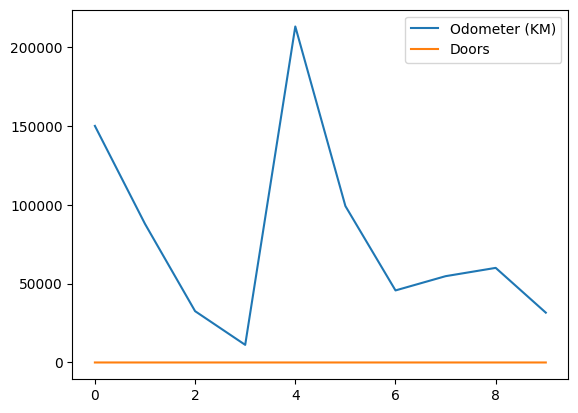

In [38]:
car_sales.plot()

O puedes comparar dos columnas pasándolas como `x` e `y` a `plot()`.

<Axes: xlabel='Make'>

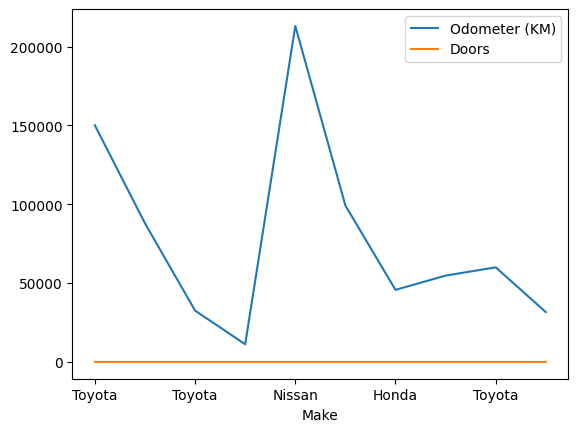

In [39]:
car_sales.plot(x='Make', )

Puedes ver la distribución de una columna llamando a `.hist()` sobre ella.

La distribución de algo es una forma de describir cómo se reparten los distintos valores.

En este caso, la mayor parte de la **distribución** (dispersión) de la columna `"Odometer (KM)"` está más hacia la izquierda del gráfico. Y hay dos valores que están más hacia la derecha. Estos dos valores a la derecha podrían considerarse **valores atípicos** (outliers, no forman parte de la mayoría).

Ahora, ¿qué pasa si queremos graficar nuestra columna `"Price"`?

Vamos a intentarlo.

Intentar ejecutarlo nos deja con un error. Esto se debe a que la columna `"Price"` de `car_sales` no está en formato numérico. Podemos darnos cuenta por el mensaje `TypeError: no numeric data to plot` que aparece al final de la celda.

Podemos comprobar esto con `.info()`.

Entonces, ¿qué podemos hacer?

Necesitamos convertir la columna `"Price"` a un tipo numérico.

¿Cómo?

Podríamos intentar varias cosas por nuestra cuenta. Pero vamos a practicar investigando.



**1.** Abre un motor de búsqueda y escribe algo como: "cómo convertir una columna de pandas llamada price a entero".

Yo encontré esto [Stack Overflow question and answer](https://stackoverflow.com/questions/44469313/price-column-object-to-int-in-pandas). Donde alguien haya tenido el mismo problema que nosotros y otra persona haya proporcionado una respuesta.

> **Nota:** A veces, la respuesta que buscas no estará en el primer resultado, ni en el segundo ni en el tercero. Puede que tengas que combinar varias soluciones diferentes. O, si es posible, puedes intentar pedir ayuda a ChatGPT.

**2.** En la práctica, leerías esto y verías si se relaciona con tu problema.

**3.** Si es así, puedes ajustar el código que aparece en la respuesta de Stack Overflow a tu propio problema.

**4.** Si aún sigues atascado, puedes intentar conversar con ChatGPT para que te ayude con tu problema (siempre y cuando los datos/problema en el que trabajas se puedan compartir; nunca compartas datos privados con nadie en Internet, incluidos los chatbots de IA).

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/pandas-steps-in-stack-overflow-process.png?raw=1" alt="steps in researching a problem you have using Google and Stack Overflow" width="1000"/>

Lo importante al principio no es memorizar cada detalle de memoria, sino saber dónde buscar. Recuerda: si tienes dudas, escribe código, ejecútalo y observa qué sucede.

Copiemos aquí el código de la respuesta y veamos cómo se relaciona con nuestro problema.

Código respuesta: ```dataframe['amount'] = dataframe['amount'].str.replace('[\$\,\.]', '').astype(int)```

Aquí está ocurriendo mucho, pero lo que podemos hacer es cambiar las partes que no están en nuestro problema y mantener el resto igual.

Nuestro `DataFrame` se llama `car_sales` no `dataframe`.

```car_sales['amount'] = car_sales['amount'].str.replace('[\$\,\.]', '').astype(int)```

Y nuestra columna `'amount'` se llama `"Price"`.

```car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)```

Eso se ve mejor. Lo que dice el código a la derecha de `car_sales["Price"]` es: "elimina el signo $ y la coma y el punto, y cambia el tipo de la celda a int".

Veamos qué sucede.

In [40]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,NaN
1,Honda,Red,87899,4,NaN
2,Toyota,Blue,32549,3,NaN
3,BMW,Black,11179,5,0
4,Nissan,White,213095,4,NaN
5,Toyota,Green,99213,4,NaN
6,Honda,Blue,45698,4,NaN
7,Honda,Blue,54738,4,NaN
8,Toyota,White,60000,4,NaN
9,Nissan,White,31600,4,NaN


¡Genial! Pero hay ceros adicionales en la columna `Price`.

Vamos a eliminarlos.

In [44]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,NaN
1,Honda,Red,87899,4,NaN
2,Toyota,Blue,32549,3,NaN
3,BMW,Black,11179,5,0
4,Nissan,White,213095,4,NaN
5,Toyota,Green,99213,4,NaN
6,Honda,Blue,45698,4,NaN
7,Honda,Blue,54738,4,NaN
8,Toyota,White,60000,4,NaN
9,Nissan,White,31600,4,NaN


Ahora vamos a graficarlo de nuevo

Esta es una de las muchas formas en que puedes manipular datos usando pandas.

Cuando ves varias funciones encadenadas una tras otra, se conoce como **encadenamiento** (chaining). Esto significa que unes una serie de funciones para realizar una tarea general.

## 6. Manipulating data

Ya has visto un ejemplo de una forma de manipular datos, pero pandas tiene muchas más.

¿Cuántas más?

Digámoslo así: si puedes imaginarlo, lo más probable es que pandas pueda hacerlo.

Empecemos con los métodos de cadenas. Como pandas está basado en Python, cualquier forma en la que puedas manipular cadenas en Python, también puedes hacerlo en pandas.

Puedes acceder al valor de cadena de una columna usando `.str` Sabiendo esto, ¿cómo crees que podrías poner en minúsculas una columna?

In [48]:
car_sales['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

Observa cómo no cambia los valores del DataFrame `car_sales` original a menos que lo asignemos explícitamente.

In [49]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,NaN
1,Honda,Red,87899,4,NaN
2,Toyota,Blue,32549,3,NaN
3,BMW,Black,11179,5,0
4,Nissan,White,213095,4,NaN


In [51]:
car_sales['Make'] = car_sales['Make'].str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,NaN
1,honda,Red,87899,4,NaN
2,toyota,Blue,32549,3,NaN
3,bmw,Black,11179,5,0
4,nissan,White,213095,4,NaN
5,toyota,Green,99213,4,NaN
6,honda,Blue,45698,4,NaN
7,honda,Blue,54738,4,NaN
8,toyota,White,60000,4,NaN
9,nissan,White,31600,4,NaN


Reasignar la columna la modifica en el DataFrame original. Esta tendencia se repite en todo tipo de manipulaciones de datos con pandas.

Algunas funciones tienen un parámetro llamado `inplace`, lo que significa que un DataFrame se actualiza en el lugar, sin necesidad de reasignarlo.

Veamos cómo se ve esto en combinación con `.fillna()`, una función que rellena datos faltantes. Pero el caso es que nuestra tabla no tiene datos faltantes.

En la práctica, es probable que trabajes con conjuntos de datos que no están completos. Esto significa que tendrás que decidir cómo rellenar los datos faltantes o eliminar las filas que los contienen.

Veamos cómo se vería una versión de nuestro DataFrame `car_sales` con valores faltantes.

In [53]:
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')

Los valores faltantes se muestran como `NaN` en pandas. Esto puede considerarse el equivalente a `None` en Python.

Vamos a usar la función [`.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) para rellenar la columna `Odometer` con el promedio de los demás valores en esa misma columna.

In [54]:
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean(), inplace=True)
car_sales_missing

C:\Users\Dell\AppData\Local\Temp\ipykernel_29540\3269724100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean(), inplace=True)


,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


Revisemos el DataFrame original de `car_sales_missing`.

In [55]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


Como `inplace` está establecido en `False` (valor por defecto), todavía hay valores faltantes en la columna `"Odometer"`.

En lugar de usar `inplace`, vamos a reasignar la columna con la versión rellenada.

Usaremos la sintaxis `df[col] = df[col].fillna(valor)` para rellenar los valores faltantes en la columna `"Odometer"` con el promedio de los demás valores en esa misma columna.

In [58]:
car_sales_missing.dropna()


,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


Ahora vamos a revisar nuevamente el DataFrame `car_sales_missing`.

Los valores faltantes en la columna `Odometer` han sido rellenados con el valor medio de esa misma columna.

En la práctica, puede que no quieras rellenar los valores faltantes con la media, pero este ejemplo sirve para mostrar la diferencia entre `inplace=False` (por defecto) y `inplace=True`.

Cuál de los dos uses dependerá de cómo estructures tu código.

Lo único que debes recordar es que `inplace=False` devuelve una copia del DataFrame con el que estás trabajando.

Esto es útil si quieres hacer una copia del DataFrame actual y guardarla en otra variable.

En cambio, `inplace=True` realiza todos los cambios directamente sobre el DataFrame original.

Ya hemos rellenado algunos valores, pero todavía hay valores faltantes en `car_sales_missing`. Supongamos que quieres eliminar todas las filas que tengan datos faltantes y trabajar solo con aquellas que estén completas.

Puedes hacer esto usando la función [`.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

Parece que las filas con valores faltantes han sido eliminadas. Ahora, vamos a comprobarlo para asegurarnos.

Hmm, todavía están ahí. ¿Puedes adivinar por qué?

Es porque `.dropna()` tiene `inplace=False` como valor por defecto. Podemos establecer `inplace=True` o reasignar el DataFrame `car_sales_missing`.

Ahora, si revisamos nuevamente, las filas con valores faltantes han desaparecido y los números de índice se han actualizado.

En lugar de eliminar o rellenar datos, ¿qué pasa si quisieras crearlos?

Por ejemplo, crear una columna llamada `Seats` para el número de asientos.

pandas permite crear columnas adicionales en un DataFrame de forma sencilla.

Tres formas comunes de hacerlo son:

1. Añadiendo una pandas.Series como columna.
2. Añadiendo una lista de Python como columna.
3. Usando columnas existentes para crear una nueva columna.

In [60]:
seats_column = pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
car_sales['Seats'] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,NaN,5
1,honda,Red,87899,4,NaN,5
2,toyota,Blue,32549,3,NaN,5
3,bmw,Black,11179,5,0,5
4,nissan,White,213095,4,NaN,5
5,toyota,Green,99213,4,NaN,5
6,honda,Blue,45698,4,NaN,5
7,honda,Blue,54738,4,NaN,5
8,toyota,White,60000,4,NaN,5
9,nissan,White,31600,4,NaN,5


Crear una columna es similar a seleccionar una columna: simplemente pasas el DataFrame objetivo junto con el nombre de la nueva columna entre corchetes.

In [65]:
engine_size = [1.9, 1.2, 0.3, 1.1, 3.4, 3.3, 6.7, 66.77, 3.4, 1.1]
car_sales['Engine Sales'] = engine_size
car_sales
price_km = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1]
car_sales['Price per KM'] = price_km
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Sales,Price per KM
0,toyota,White,150043,4,NaN,5,1.90,1
1,honda,Red,87899,4,NaN,5,1.20,2
2,toyota,Blue,32549,3,NaN,5,0.30,3
3,bmw,Black,11179,5,0,5,1.10,4
4,nissan,White,213095,4,NaN,5,3.40,5
5,toyota,Green,99213,4,NaN,5,3.30,6
6,honda,Blue,45698,4,NaN,5,6.70,7
7,honda,Blue,54738,4,NaN,5,66.77,8
8,toyota,White,60000,4,NaN,5,3.40,9
9,nissan,White,31600,4,NaN,5,1.10,1


También puedes crear una columna combinando directamente los valores de otras columnas. Por ejemplo, el precio por kilómetro usando la columna Odometer.

In [66]:
car_sales["Price per KM"] = car_sales["Price"]/car_sales["Odometer (KM)"]
car_sales

TypeError: unsupported operand type(s) for /: 'str' and 'int'

¿Ahora puedes pensar por qué esta columna podría no ser una buena idea?

Podría resultar confusa cuando un coche con menos kilómetros en el odómetro parece costar más por kilómetro que uno con más.

Cuando se compra un coche, normalmente menos kilómetros en el odómetro es mejor.

Este tipo de creación de columnas se llama la práctica de enriquecer tu conjunto de datos con más información (ya sea a partir de él directamente o desde fuentes externas).

Si `Make`, `Colour`, `Doors` son características de los datos, crear `Price per KM` podría ser otra. Pero en este caso, no es una muy buena.

En cuanto a la creación de columnas, también puedes crear una nueva columna asignando un mismo valor estándar a todas las filas.

Ahora que has creado algunas columnas, decides mostrarle a tu colega lo que has hecho. Cuando te pregunta por la columna `Price per KM`, le dices que en realidad no estás muy seguro de por qué está ahí.

Decides que es mejor eliminarla para evitar confusiones.

Puedes eliminar una columna usando [`.drop('COLUMN_NAME', axis=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [67]:
car_sales = car_sales.drop("Price per KM", axis=1)
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Sales
0,toyota,White,150043,4,NaN,5,1.90
1,honda,Red,87899,4,NaN,5,1.20
2,toyota,Blue,32549,3,NaN,5,0.30
3,bmw,Black,11179,5,0,5,1.10
4,nissan,White,213095,4,NaN,5,3.40
5,toyota,Green,99213,4,NaN,5,3.30
6,honda,Blue,45698,4,NaN,5,6.70
7,honda,Blue,54738,4,NaN,5,66.77
8,toyota,White,60000,4,NaN,5,3.40
9,nissan,White,31600,4,NaN,5,1.10


¿Por qué `axis=1`? Porque ese es el eje en el que viven las columnas. Las filas están en el `axis=0`.

Supongamos que quieres barajar el orden de tu DataFrame para poder dividirlo en conjuntos de entrenamiento, validación y prueba. Y aunque el orden de tus muestras ya sea aleatorio, quieres asegurarte de ello.

Para hacerlo, puedes usar [`.sample(frac=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

`.sample()` selecciona aleatoriamente diferentes filas de un DataFrame.

El parámetro `frac` indica la fracción de filas a seleccionar, donde 1 = 100% de las filas, 0.5 = 50% de las filas, 0.01 = 1% de las filas.

También puedes usar `.sample(n=1)`, donde `n` es el número de filas que deseas seleccionar.

Observa cómo las filas permanecen intactas pero su orden se mezcla (fíjate en los índices).

`.sample(frac=X)` también es útil cuando trabajas con un DataFrame grande.

Supongamos que tienes 2.000.000 de filas.

Ejecutar pruebas, análisis y algoritmos de aprendizaje automático sobre 2.000.000 de filas puede llevar mucho tiempo. Y como ser científico de datos o ingeniero de machine learning implica reducir el tiempo entre experimentos, podrías comenzar trabajando con una muestra de filas.

Por ejemplo, podrías usar `40k_rows = 2_mil_rows.sample(frac=0.05)` para trabajar con 40.000 filas de un DataFrame llamado `2_mil_rows` que contiene 2.000.000 de filas.

¿Y si quisieras restablecer los índices?

Puedes hacerlo usando [`.reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).

In [68]:
car_sales.sample.reset_index()

AttributeError: 'function' object has no attribute 'reset_index'

Llamar a `.reset_index()` sobre un DataFrame restablece los números de índice a sus valores por defecto. También crea por defecto una nueva columna llamada `index` que contiene los valores de índice anteriores.

Finalmente, ¿qué pasa si quisieras aplicar una función a una columna? Por ejemplo, convertir la columna `Odometer` de kilómetros a millas.

Puedes hacerlo usando la función [`.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) y pasarle una [función lambda](https://www.w3schools.com/python/python_lambda.asp). Sabemos que hay aproximadamente 1.6 kilómetros en una milla, así que si divides el valor de la columna Odometer entre 1.6, deberías obtener la conversión a millas.

In [69]:
car_sales['Odometer (KM)'].apply(lambda x: x / 1.6)


0     93776.875
1     54936.875
2     20343.125
3      6986.875
4    133184.375
5     62008.125
6     28561.250
7     34211.250
8     37500.000
9     19750.000
Name: Odometer (KM), dtype: float64